In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [9]:
mu=0.0
sigma=1.0
# нормально распределенная случайная величина
norm_rv=sts.norm(loc=mu,scale=sigma)
#генерация 10 значений
norm_rv.rvs(size=10)

array([ 0.62062122,  0.62341144,  1.53896719, -0.49759783, -0.42804768,
       -1.14443253, -0.82633244,  1.68774329, -0.10657506,  1.87865198])

In [11]:
#нахождение функции распределения в точке
norm_rv.cdf(0)

0.5

Text(0.5, 0, '$x$')

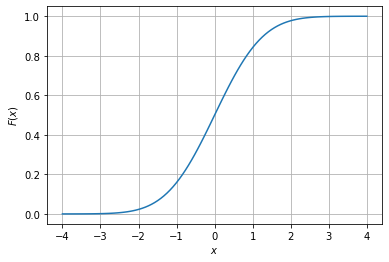

In [24]:
x=np.linspace(-4,4,100)#нарезание на 100 отрезков
cdf=norm_rv.cdf(x)
plt.plot(x,cdf)
plt.ylabel('$F(x)$')
plt.grid()#решетка
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

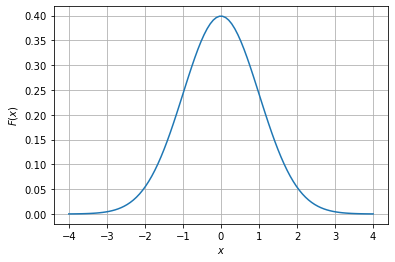

In [25]:
x=np.linspace(-4,4,100)#нарезание на 100 отрезков
pdf=norm_rv.pdf(x)
plt.plot(x,pdf)
plt.ylabel('$F(x)$')
plt.grid()#решетка
plt.xlabel('$x$')

In [26]:
def integral(f,a,b,dx=0.01):
    n=int((b-a)/dx)
    x=a
    sum=0.0
    for i in range(n):
        sum+=f(x)*dx
        x+=dx
    return sum

In [29]:
x0=1.0
print("Значение интеграла от функции плотности: {}".format(
    round(integral(norm_rv.pdf,-5,x0,0.01),2)))
print("Значение функции распределения: {}".format(round(norm_rv.cdf(x0),2)))

Значение интеграла от функции плотности: 0.84
Значение функции распределения: 0.84


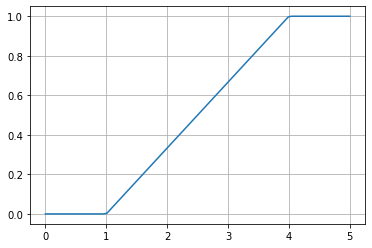

In [32]:
#равномерное распределение
a=1
b=4
uniform_rv=sts.uniform(a,b-a)
x=np.linspace(0,5,100)
cdf=uniform_rv.cdf(x)
plt.plot(x,cdf)
plt.grid()

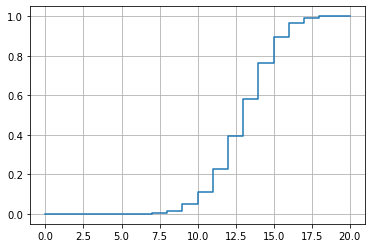

In [45]:
binomial_rv=sts.binom(20,0.7)#число испытаний, вероятность успеха
y=np.linspace(0,20,21)
cdf=binomial_rv.cdf(y)
plt.step(y,cdf)
plt.grid()

In [40]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

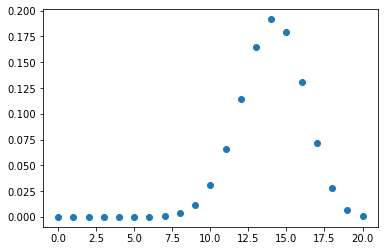

In [50]:
pmf=binomial_rv.pmf(x)
plt.plot(x,pmf,'o')

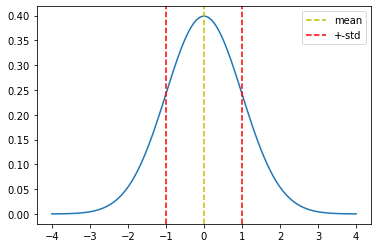

In [54]:
x=np.linspace(-4,4,100)
pdf=norm_rv.pdf(x)
plt.plot(x,pdf)
#norm_rv.std - дисперсия
#norm_rv.mean - среднее значение
#norm_rv.median - медиана
plt.axvline(x=norm_rv.mean(),color='y',linestyle='--',label='mean')
plt.axvline(x=norm_rv.mean()+norm_rv.std(),color='r',linestyle='--',label='+-std')
plt.axvline(x=norm_rv.mean()-norm_rv.std(),color='r',linestyle='--')
plt.legend()

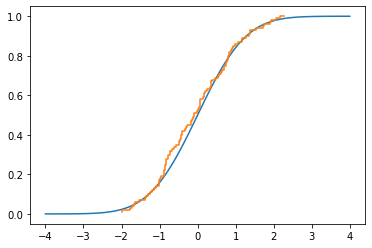

In [60]:
norm_rv=sts.norm(0,1)
sample=norm_rv.rvs(100)
x=np.linspace(-4,4,100)
cdf=norm_rv.cdf(x)
plt.plot(x,cdf,label='теорметическое норм распределение')
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(sample)
plt.step(ecdf.x,ecdf.y,label="ECDF")


(array([ 5.,  7., 19., 13., 13., 13., 15.,  7.,  3.,  5.]),
 array([-1.97716535, -1.55223931, -1.12731327, -0.70238723, -0.27746119,
         0.14746485,  0.57239089,  0.99731692,  1.42224296,  1.847169  ,
         2.27209504]),
 <BarContainer object of 10 artists>)

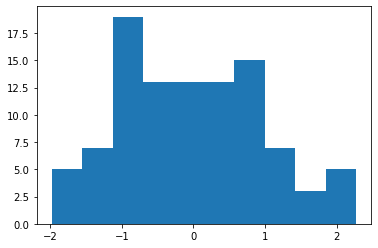

In [65]:
plt.hist(sample,bins=10)


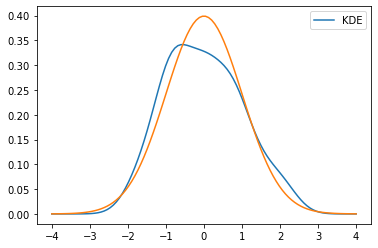

In [68]:
kde=sts.gaussian_kde(sample)#сглаживание
plt.plot(x,kde(x),label="KDE")
pdf=norm_rv.pdf(x)
plt.plot(x,pdf)
plt.legend()